In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [51]:
data= pd.read_csv('https://raw.githubusercontent.com/praveendecode/Datasets/main/Time%20Series%20Dataset/airline-passengers.csv')

In [52]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

In [53]:
data.sample(10)

,Passengers
Month,
1952-03-01,193
1959-07-01,548
1952-11-01,172
1954-04-01,227
1953-09-01,237
1958-09-01,404
1955-08-01,347
1959-09-01,463
1955-10-01,274


# **Visualize the Time Series**

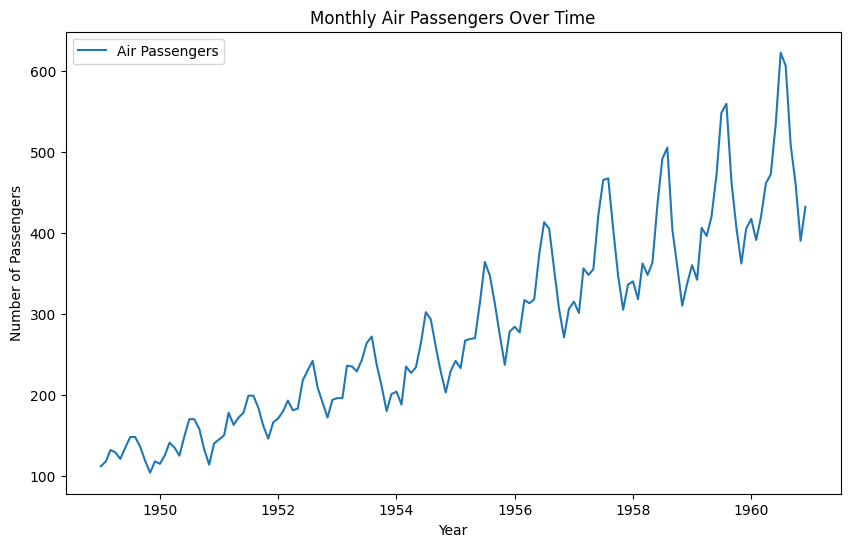

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Passengers'], label='Air Passengers')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [55]:
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


# **Decompose the Time Series**

In [56]:
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')

In [57]:
trend = decomposition.trend

In [58]:
seasonal = decomposition.seasonal

In [59]:
residual = decomposition.resid

## **Plot the decomposed components**

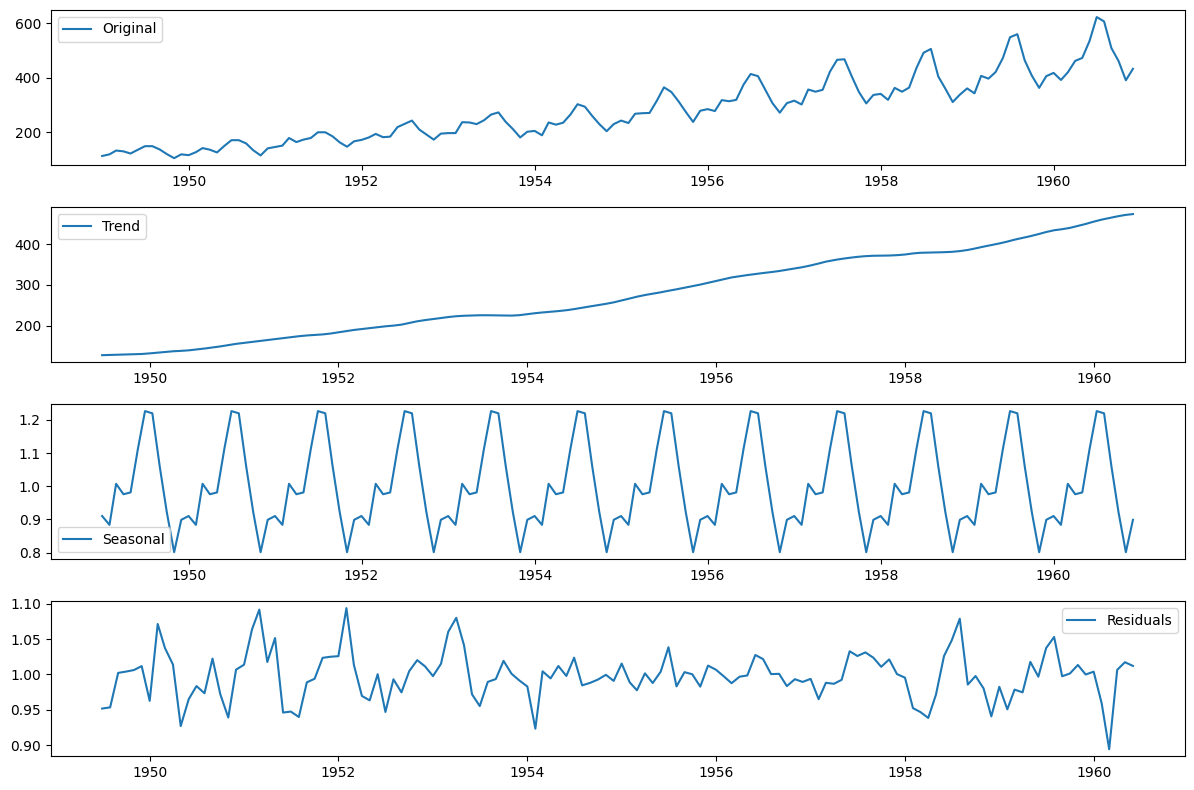

In [60]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Passengers'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

# **Fit a Time Series Model (ARIMA)**

In [64]:
order = (2, 1, 2)

In [66]:
model = ARIMA(data['Passengers'], order=order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# **Evaluate Model**

In [68]:
forecast_steps = 12

In [69]:
forecast = fit_model.get_forecast(steps=forecast_steps)

**Plot**

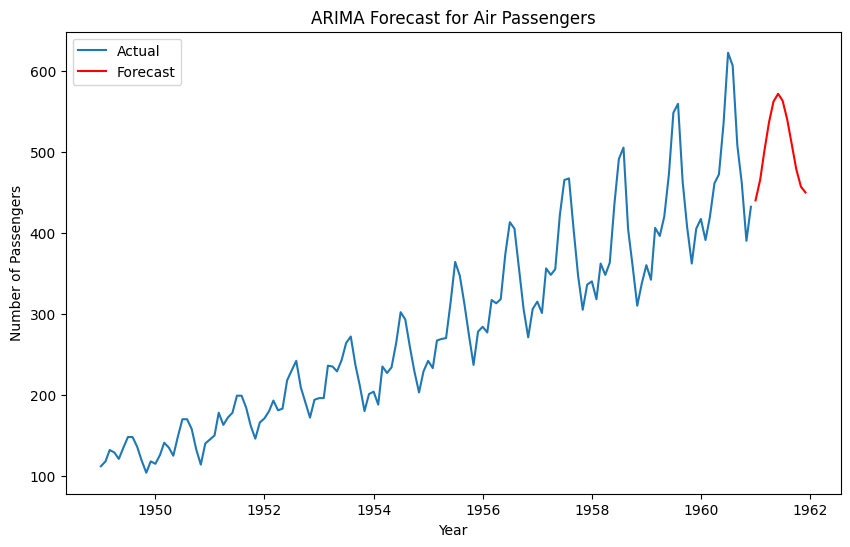

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('ARIMA Forecast for Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()